# Análisis Exploratorio de Datos para captar diabetes en una persona.

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 44.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.9 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import pandas as pd

df = pd.read_csv('../diabetes-db.csv')

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## 1. Ver la distribución de la variable objetivo

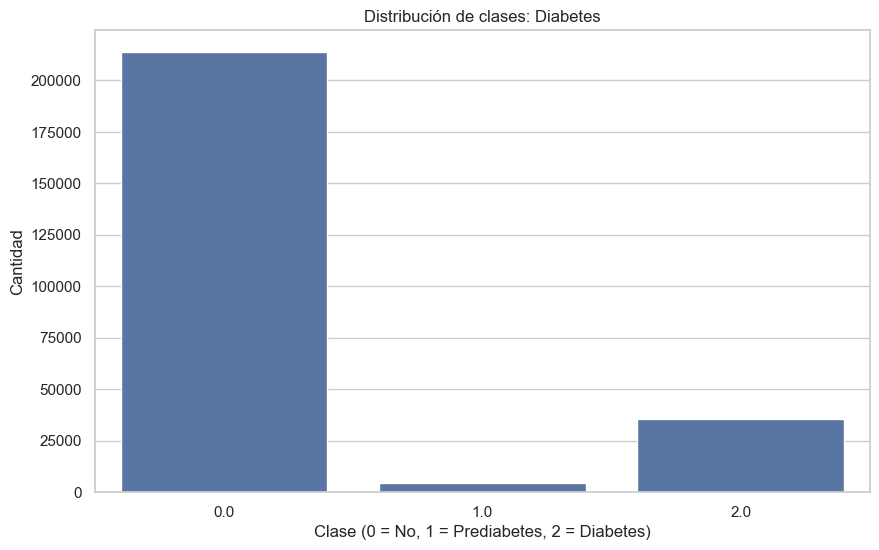

In [ ]:
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribución de clases')
plt.xlabel('Clase (0 = No, 1 = Prediabetes, 2 = Diabetes)')
plt.ylabel('Cantidad')
plt.show()


## 2. Distribución de vairbales numéricas

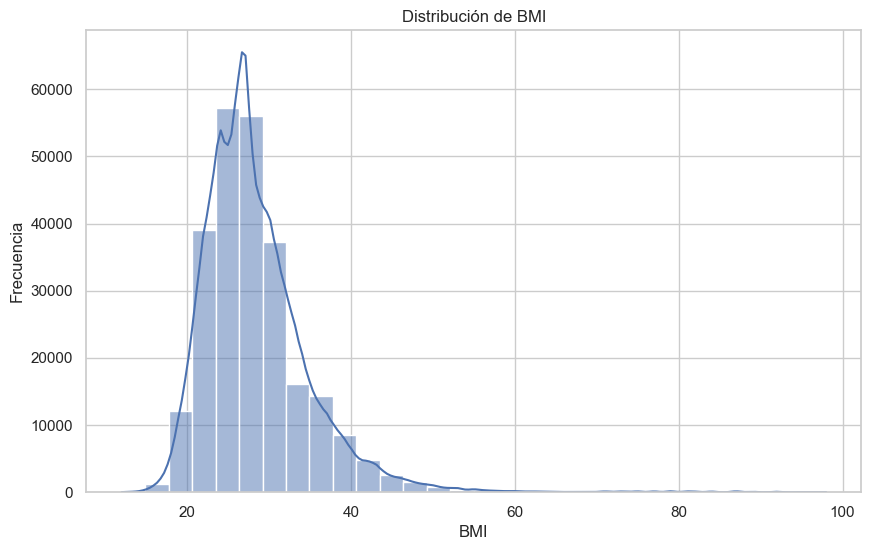

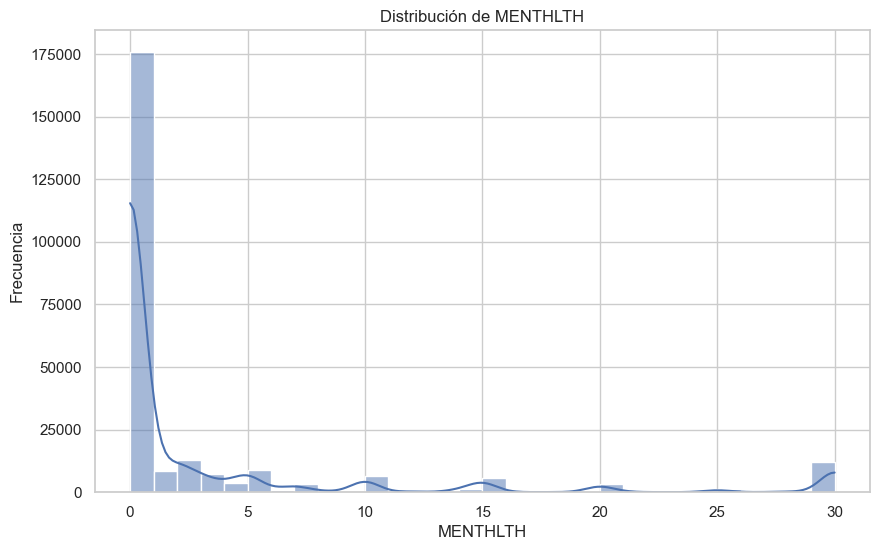

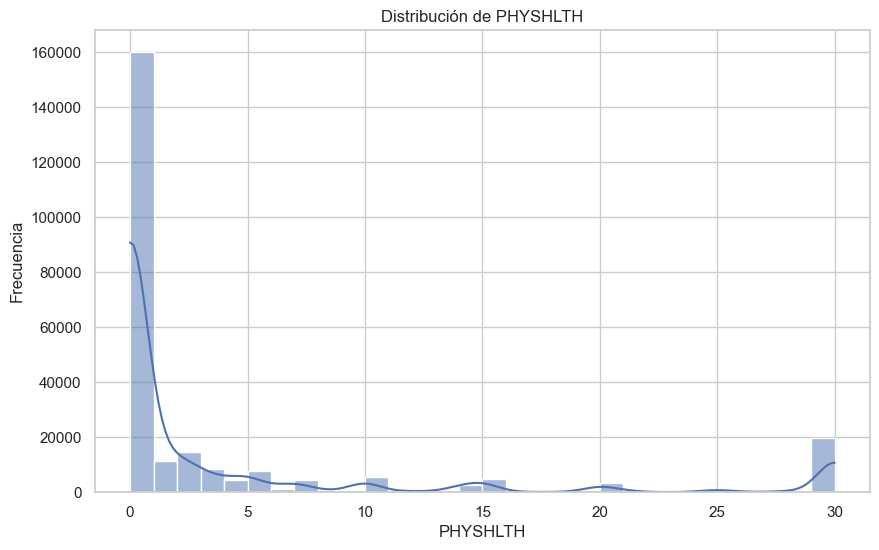

In [12]:

# Histogramas de variables continuas
num_vars = ['BMI', 'MentHlth', 'PhysHlth']
for col in num_vars:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col.upper()}')
    plt.xlabel(col.upper())
    plt.ylabel('Frecuencia')
    plt.show()


## 3. Matriz de correlación

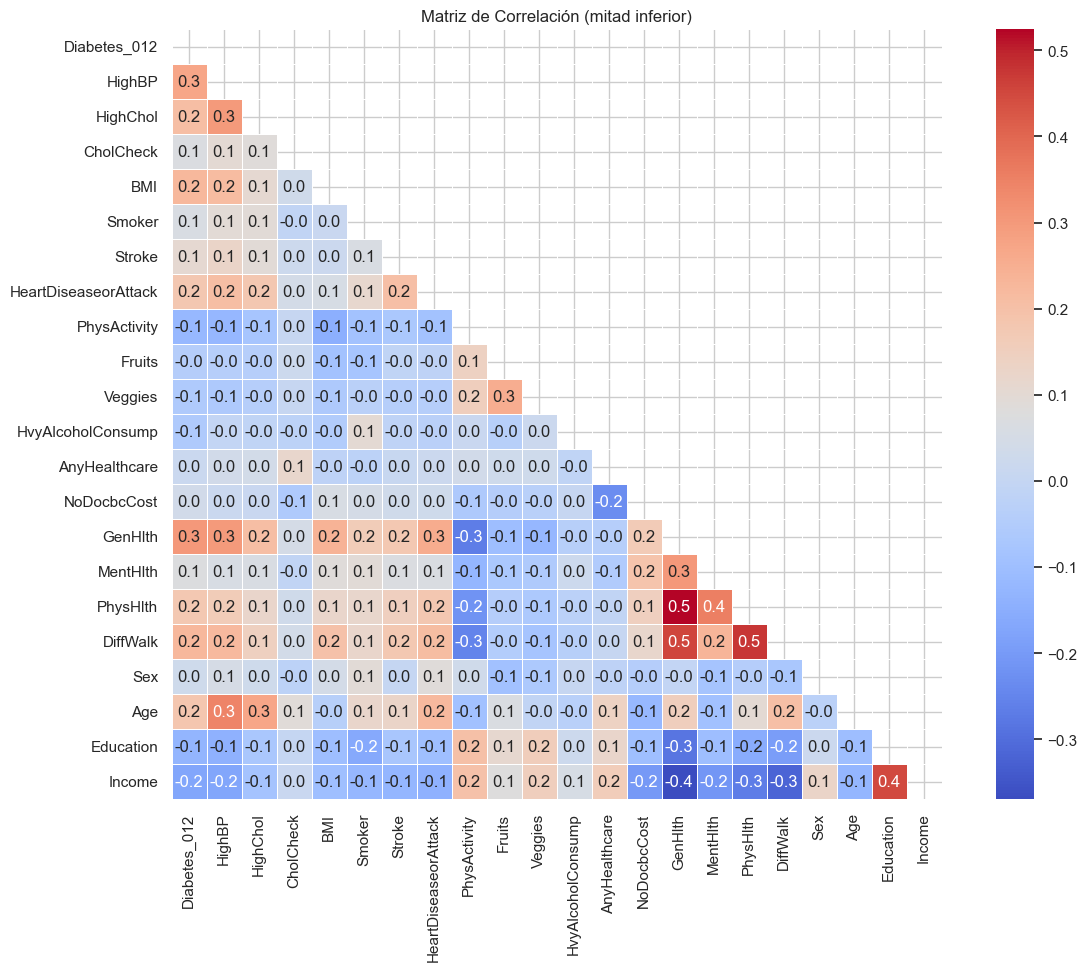

In [27]:
import numpy as np

# Calcular la matriz de correlación
corr = df.corr(numeric_only=True)

# Crear una máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Dibujar el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, square=True)
plt.title('Matriz de Correlación (mitad inferior)')
plt.show()


Ya que la correlación entre diabetes_012 y "Sex", "NoDocbcCost", "AnyHealthcare", "Fruits" es casi nulo, (<0.02) procedemos a eliminar las columnas correspondientes.

In [30]:
cols_to_drop = ["Sex", "NoDocbcCost", "AnyHealthcare", "Fruits"]
df_cleaned = df.drop(columns=cols_to_drop)

print("Dataset limpio:")
df_cleaned.head()

Dataset limpio:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0


## Analizar las variables que vamos a necesitar normalizar tras los inputs


1. HighBP: necesitaremos 2 inputs, peso y altura, y con estos 2 inputs calcular el BMI con la siguiente fórmula: 

    ```python
    def calcular_bmi_metrico(peso_kg, altura_m):
        return peso_kg / (altura_m ** 2)
    ```
### Conclusión:
El "HighBP" es la única variable que debemos normalizar cuando se pase los inputs en el frontend. 